<a href="https://colab.research.google.com/github/ZewdieMc/Client-Server-Docker-Compose-example/blob/master/PretrainedVGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

# re-size all the images to this
IMAGE_SIZE = [360, 360]

train_path = '/content/drive/MyDrive/Original Coffee4pretrained'
valid_path = '/content/drive/MyDrive/test4pretrained'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/Original Coffee4pretrained/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Original Coffee4pretrained',
                                                 target_size = (360, 360),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/test4pretrained',
                                            target_size = (360, 360),
                                            batch_size = 1,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


import tensorflow as tf

from keras.models import load_model

model.save('VGG16_model.h5')


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 360, 360, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 360, 360, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 360, 360, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 180, 180, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 180, 180, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 180, 180, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 90, 90, 128)       0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:71: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/25
960/960 [==============================] - 90s 93ms/step - loss: 5.1073 - accuracy: 0.5219 - val_loss: 4.3081 - val_accuracy: 0.5833
Epoch 2/25
960/960 [==============================] - 88s 92ms/step - loss: 3.2397 - accuracy: 0.7063 - val_loss: 3.7799 - val_accuracy: 0.7000
Epoch 3/25
960/960 [==============================] - 88s 92ms/step - loss: 2.6048 - accuracy: 0.7500 - val_loss: 2.0287 - val_accuracy: 0.8000
Epoch 4/25
960/960 [==============================] - 88s 92ms/step - loss: 2.8987 - accuracy: 0.7823 - val_loss: 2.4491 - val_accuracy: 0.8042
Epoch 5/25
960/960 [==============================] - 88s 92ms/step - loss: 2.5250 - accuracy: 0.8073 - val_loss: 4.9374 - val_accuracy: 0.6583
Epoch 6/25
960/960 [==============================] - 88s 92ms/step - loss: 2.0799 - accuracy: 0.8354 - val_loss: 3.0380 - val_accuracy: 0.8292
Epoch 7/25
960/960 [==============================] - 88s 92ms/step - loss: 1.9076 - accuracy: 0.8448 - val_loss: 2.2166 - val_accuracy:

In [ ]:

train_loss, train_acc=model.evaluate_generator(training_set,steps=16)
test_loss, test_acc= model.evaluate_generator(test_set, steps=16)
print('Test accuracy of CNN  ...')
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Test accuracy of CNN  ...
Train: 0.938, Test: 0.875


['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


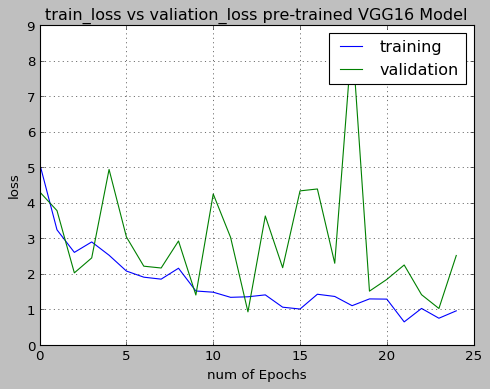

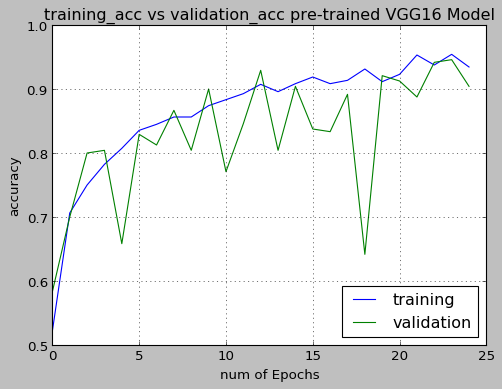

In [ ]:
train_loss=r.history['loss']
val_loss=r.history['val_loss']
train_acc=r.history['accuracy']
val_acc=r.history['val_accuracy']
xc=range(25)
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs valiation_loss pre-trained VGG16 Model')
plt.grid(True)
plt.legend(['training','validation'])
print(plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['fast'])
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('training_acc vs validation_acc pre-trained VGG16 Model')
plt.grid(True)
plt.legend(['training','validation'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['fast'])
#output_layer = model.layers[1].get_output()
#output_fn = theano.function([model.layers[0].get_input()], output_layer)
